CHURN LABEL TO PREDICT CUSTOMER THAT WILL EXIT 

In [2]:
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from ipywidgets import interact
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report, confusion_matrix)

In [4]:
filepath = ("Desktop/bank_churn_dataset_80k.csv")
filepath

'Desktop/bank_churn_dataset_80k.csv'

In [6]:
def wrangle(filepath):
    # Load CSV
    df = pd.read_csv(filepath)
    
    df.set_index("id", inplace=True)
    df = df.drop(
        columns=["full_name", "risk_segment", "occupation", "created_date", "last_active_date", "address", "origin_province", "active_member", "gender", "customer_segment", "loyalty_level", "digital_behavior"]
    )
    
    return df

In [8]:
df= wrangle(filepath)

In [10]:
print(df.shape)
df.head()

(80000, 13)


,credit_sco,age,balance,monthly_ir,tenure_ye,married,nums_card,nums_service,last_transaction_month,exit,engagement_score,risk_score,cluster_group
id,,,,,,,,,,,,,
1,725,55,177306004,121000000,0,2,4,8,91038993,False,90,0.0359,4
2,689,45,1927416,5000000,3,1,3,2,3255569,False,63,0.2664,2
3,702,44,304931745,109000000,4,0,2,8,0,False,36,0.1343,4
4,766,44,50615501,79000000,3,0,4,3,0,False,23,0.2185,4
5,677,77,40532432,25000000,2,1,4,3,0,False,23,0.2942,2


In [12]:
df.columns

Index(['credit_sco', 'age', 'balance', 'monthly_ir', 'tenure_ye', 'married',
       'nums_card', 'nums_service', 'last_transaction_month', 'exit',
       'engagement_score', 'risk_score', 'cluster_group'],
      dtype='object')

Split Data

In [15]:
target ="exit"
X= df.drop(columns =target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (80000, 12)
y shape: (80000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
#Random: Over Sampling

over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over_sample:",X_train_over.shape)
X_train_over.head()

X_train_over_sample: (105086, 12)


,credit_sco,age,balance,monthly_ir,tenure_ye,married,nums_card,nums_service,last_transaction_month,engagement_score,risk_score,cluster_group
0,693,29,72948313,35000000,4,1,2,2,0,14,0.2636,2
1,753,62,42400743,109000000,0,1,4,3,0,23,0.2206,4
2,746,57,39298974,24000000,2,1,4,2,12486837,65,0.1810,2
3,719,27,6671171,8000000,1,0,1,1,0,7,0.3519,1
4,651,46,11787621,6000000,3,1,1,4,0,18,0.3606,2


BUILD MODEL: BASELINE

In [22]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline,4))

Baseline Accuracy: 0.821


In [24]:
#Gradient Boosting trees
clf = make_pipeline(SimpleImputer(), GradientBoostingClassifier())

In [26]:
params ={
    "simpleimputer__strategy":["mean", "median"],
    "gradientboostingclassifier__n_estimators": range(20, 31, 5),
    "gradientboostingclassifier__max_depth": range(2,5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [28]:
model= GridSearchCV(clf, param_grid = params, cv=5, n_jobs=1, verbose=1)

In [30]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [31]:
results =pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,5.781201,0.437430,0.022562,0.006199,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.777048,0.779417,0.780939,0.778608,0.777799,0.778762,0.001346,1
16,6.367053,0.903280,0.024068,0.006379,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.777001,0.779417,0.780939,0.778608,0.777799,0.778753,0.001358,2
15,5.230335,0.320977,0.019390,0.003796,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.776335,0.778084,0.779179,0.777751,0.778037,0.777877,0.000912,3
14,5.319032,0.646797,0.022097,0.005059,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.776335,0.778084,0.779179,0.777751,0.778037,0.777877,0.000912,3
13,4.077103,0.548804,0.016537,0.001819,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.776382,0.778703,0.778560,0.776752,0.777418,0.777563,0.000935,5
12,3.721086,0.312573,0.017982,0.000631,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.776382,0.778703,0.778560,0.776752,0.777418,0.777563,0.000935,5
11,4.978555,0.562665,0.016206,0.001447,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.774479,0.778798,0.777466,0.775705,0.776514,0.776593,0.001476,7
10,4.567442,0.467925,0.023249,0.007842,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.774479,0.778798,0.777466,0.775705,0.776514,0.776593,0.001476,7
9,3.719116,0.208411,0.013193,0.004785,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.774146,0.777466,0.775658,0.772470,0.775705,0.775089,0.001679,9
8,4.068720,0.491958,0.020317,0.003039,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.774146,0.777466,0.775658,0.772470,0.775705,0.775089,0.001679,9


In [34]:
#Best Hyperparameters
model.predict(X_train_over)

array([False, False, False, ...,  True,  True,  True])

In [36]:
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

In [38]:
#Classification Report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.95      0.71      0.81     13057
        True       0.39      0.85      0.54      2943

    accuracy                           0.73     16000
   macro avg       0.67      0.78      0.67     16000
weighted avg       0.85      0.73      0.76     16000



In [40]:

# Training predictions
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Validation predictions
y_test_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

Training Accuracy: 0.733421875
Validation Accuracy: 0.7324375


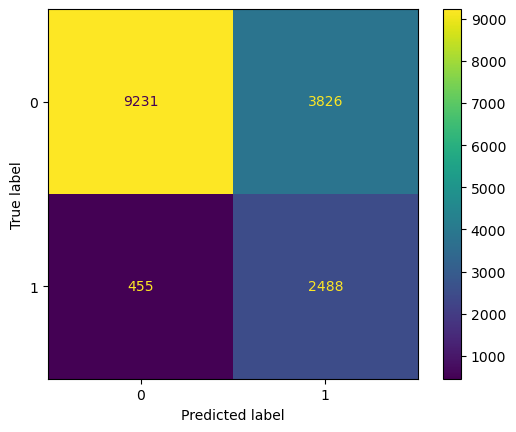

In [42]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [44]:
#Prediction visualisation
def visualize_predictions():
    y_proba = model.predict_proba(X_test)[:, 1]

    plt.figure()
    plt.hist(y_proba[y_test == 0], bins=30, alpha=0.6, label="Class 0")
    plt.hist(y_proba[y_test == 1], bins=30, alpha=0.6, label="Class 1")
    plt.axvline(0.5, linestyle="--", label="Threshold = 0.5")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Count")
    plt.legend()
    plt.title("Prediction Probability Distribution")
    plt.show()

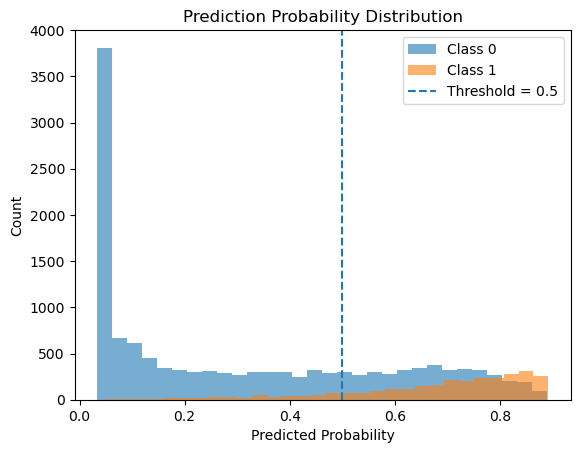

In [46]:
visualize_predictions()

In [48]:
#Threshold Visualisation
def threshold_summary(thresholds=[0.3, 0.5, 0.7]):
    y_proba = model.predict_proba(X_test)[:, 1]

    for t in thresholds:
        y_pred = (y_proba > t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        print(f"\nThreshold: {t}")
        print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

In [50]:
threshold_summary()


Threshold: 0.3
TP: 2806, FP: 5861, FN: 137, TN: 7196

Threshold: 0.5
TP: 2488, FP: 3826, FN: 455, TN: 9231

Threshold: 0.7
TP: 1690, FP: 1597, FN: 1253, TN: 11460


# Summary of Prediction
I developed and evaluated a classification model to predict target outcomes using structured data. The model was trained and tested using a clear train–validation–test split to ensure reliable performance on unseen data.

The final model achieved a test accuracy of approximately 73%, with training and validation accuracies closely aligned. This consistency indicates strong generalization and minimal overfitting, demonstrating that the model learned meaningful patterns rather than memorizing the training data.

Beyond accuracy, I analyzed prediction behavior using confusion matrices and probability-based predictions. This approach provided deeper insight into false positives and false negatives and allowed for informed evaluation of model errors. By leveraging predicted probabilities, I implemented custom threshold tuning, enabling control over the precision–recall trade-off depending on decision requirements.

Threshold analysis showed that lower thresholds increased sensitivity to positive cases, while higher thresholds reduced false positives. A balanced threshold provided stable performance, making the model adaptable to different real-world scenarios.

Overall, this project demonstrates my ability to:

Build and evaluate predictive models

Diagnose overfitting and generalization

Interpret model outputs beyond accuracy

Apply probability-based decision-making for practical use cases

This work highlights a strong foundation in applied machine learning, model evaluation, and data-driven decision support.